# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timedelta
from ipywidgets.embed import embed_minimal_html

# Import API key
from api_keys import api_key, gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

660

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_weather_data = []
query_url = base_url + "appid=" + api_key + "&units=metric&q="

i=0

for item in cities:
    
    try:
       
        response = requests.get(query_url + item).json()
        city = response['name']
        cloudiness = response['clouds']['all']
        if cloudiness > 100:
            cloudiness = ""
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        if humidity > 100: 
            humidity = ""
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        max_temp=response['main']['temp_max']
        wind_speed=response['wind']['speed']
        
        print(f"Reading city number {i}: {item}")
            
        dict = {"City":city,"Country":country,"Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,
           "Max Temp":max_temp,"Wind Speed":wind_speed,"Cloudiness":cloudiness}

        city_weather_data.append(dict)
        
        i += 1
  
    except:
        
        print(f'error reading city: {item}')
     
    time.sleep(1)

Reading city number 0: avarua
Reading city number 1: hobart
Reading city number 2: saint-philippe
Reading city number 3: zhangjiakou
Reading city number 4: roald
Reading city number 5: atuona
Reading city number 6: mujiayingzi
Reading city number 7: gornopravdinsk
Reading city number 8: bethel
Reading city number 9: fairbanks
Reading city number 10: torbay
Reading city number 11: tyukalinsk
Reading city number 12: ngunguru
Reading city number 13: angostura
Reading city number 14: gat
Reading city number 15: punta arenas
error reading city: taolanaro
Reading city number 16: luanda
Reading city number 17: albany
Reading city number 18: butaritari
Reading city number 19: porgera
Reading city number 20: caravelas
Reading city number 21: egvekinot
Reading city number 22: freeport
Reading city number 23: mataura
Reading city number 24: oloron-sainte-marie
Reading city number 25: kruisfontein
Reading city number 26: new norfolk
Reading city number 27: provideniya
Reading city number 28: sola


Reading city number 219: bagdarin
Reading city number 220: wahiawa
Reading city number 221: solnechnyy
Reading city number 222: brae
Reading city number 223: nanortalik
Reading city number 224: uarini
Reading city number 225: chapais
Reading city number 226: half moon bay
Reading city number 227: palu
Reading city number 228: ohara
Reading city number 229: maputo
Reading city number 230: panguna
Reading city number 231: hami
Reading city number 232: xinzhi
Reading city number 233: kumluca
Reading city number 234: manokwari
Reading city number 235: businga
Reading city number 236: riyadh
Reading city number 237: matagami
Reading city number 238: gladstone
Reading city number 239: havre-saint-pierre
Reading city number 240: chifeng
Reading city number 241: zholymbet
Reading city number 242: howard springs
error reading city: labrea
Reading city number 243: paamiut
Reading city number 244: tilichiki
Reading city number 245: axim
Reading city number 246: makasar
Reading city number 247: sh

Reading city number 431: port moresby
Reading city number 432: pathein
Reading city number 433: tacna
error reading city: rogun
Reading city number 434: tingi
Reading city number 435: makat
Reading city number 436: keita
Reading city number 437: khandyga
error reading city: naftah
Reading city number 438: victoria point
Reading city number 439: hersbruck
Reading city number 440: aquiraz
Reading city number 441: xuddur
error reading city: yunjinghong
Reading city number 442: tessalit
Reading city number 443: corni
error reading city: maridi
error reading city: asau
Reading city number 444: santa vitoria do palmar
Reading city number 445: novobiryusinskiy
Reading city number 446: verkhoyansk
Reading city number 447: saint-pierre
Reading city number 448: maceio
Reading city number 449: saiha
Reading city number 450: ippy
Reading city number 451: elliot
Reading city number 452: mumford
Reading city number 453: ahipara
Reading city number 454: saint anthony
Reading city number 455: neuquen


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_weather_data_df = pd.DataFrame(city_weather_data)
city_weather_data_df['Date'] = pd.to_datetime(city_weather_data_df['Date'],unit='s')
city_weather_data_df['Date'] = city_weather_data_df['Date'].dt.date
city_weather_data_df


,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Cloudiness
0,Avarua,CK,2019-11-11,83,-21.21,-159.78,23.00,3.10,27
1,Hobart,AU,2019-11-11,17,-42.88,147.33,24.44,9.80,100
2,Saint-Philippe,CA,2019-11-11,63,45.36,-73.48,0.56,4.10,90
3,Zhangjiakou,CN,2019-11-11,39,40.77,114.88,5.25,2.79,0
4,Roald,NO,2019-11-11,79,62.58,6.12,-4.00,4.60,0
...,...,...,...,...,...,...,...,...,...
581,Gillette,US,2019-11-11,91,44.29,-105.50,-15.00,4.60,20
582,Dzerzhinsk,RU,2019-11-11,93,56.24,43.46,6.00,6.00,90
583,Xingyi,CN,2019-11-11,63,24.19,102.82,21.24,3.24,6
584,Okha,RU,2019-11-11,59,53.59,142.95,-2.50,2.09,15


In [12]:
city_weather_data_df.to_csv("weatherdata.csv")
city_weather_data_df.to_html("weatherdata.html")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [13]:
date2 = datetime.fromtimestamp(date).strftime('%m/%d/%Y')


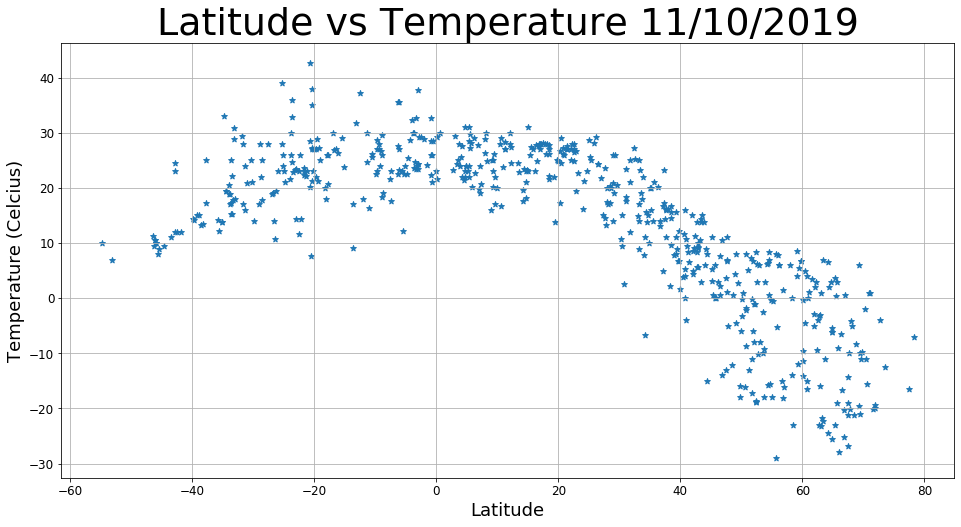

In [15]:

plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Max Temp'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Temperature", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Temperature (Celcius)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

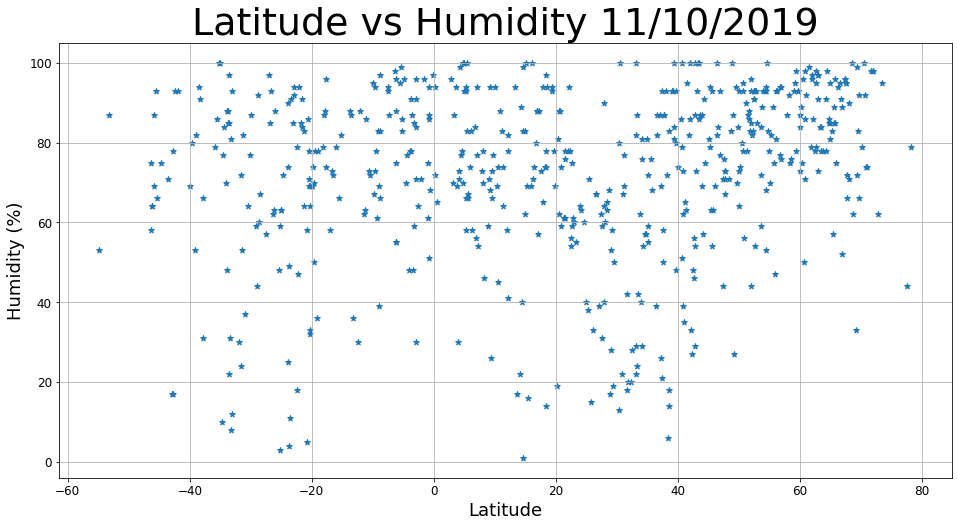

In [16]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Humidity'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Humidity", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Humidity (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

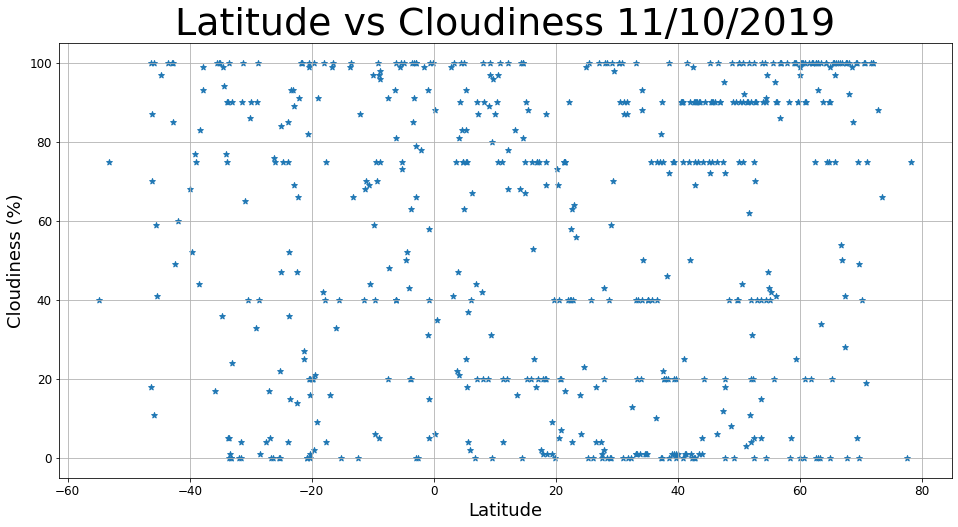

In [17]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Cloudiness'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Cloudiness", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Cloudiness (%)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

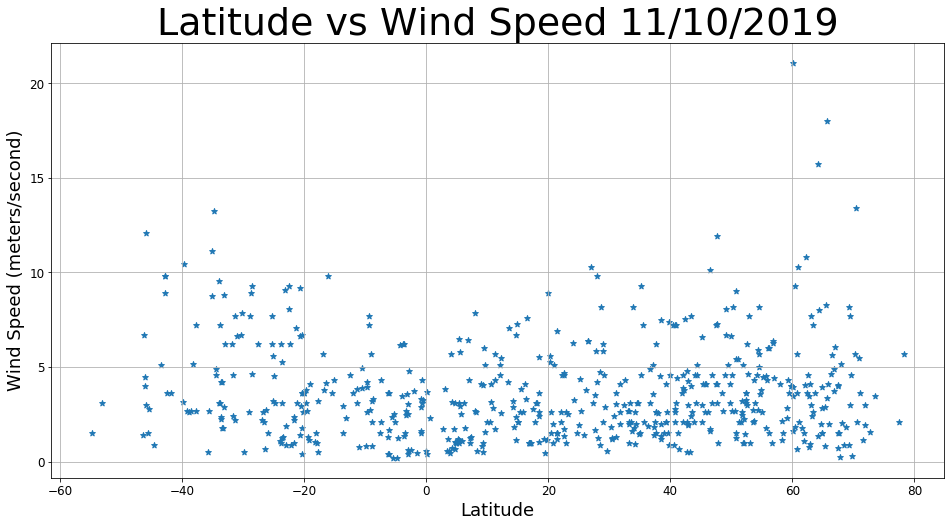

In [18]:
plt.scatter(city_weather_data_df['Lat'], city_weather_data_df['Wind Speed'], marker = "*")
plt.title('{0} {1}'.format("Latitude vs Wind Speed", date2), fontsize =38)
plt.xlabel("Latitude", fontsize = 18)
plt.ylabel("Wind Speed (meters/second)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.grid()
plt.savefig("WindSpeed.png")
plt.show()

Observations:

1: Some of the openweather entries contain % Humidity that is above 100%, which is not possible and which skews the visualization of the data.   As such, I exclude any values over 100% on Humidity or Cloudiness.

2: The scatterplot for temperature vs latitude reflect the expected result of high values at the equator and low values at the polls.  This was just as pronounced when a small number of datapoints was plotted as it was when 500+ points were plotted.

3: The scatterplot for humidity vs. latitude reflects a less pronounced trend, but closer to the equator, humidity is more consistently high, in comparison to spots more distant from the equator.  In earlier runs of the data with less than 500 points, this was unpronounced and no such observation was possible, but becomes clearer with a large number of datapoints.   There does not appear to be a correlation between latitude and either cloudiness or wind speed.




In [35]:
#from api_keys import gkey
import webbrowser
import gmaps
from random import randint

gmaps.configure(api_key=gkey)

coordinate_list = []
city_list = []
x=0
for rows in city_weather_data_df.iterrows():
    latitude=city_weather_data_df.iloc[x,4]
    longitude=city_weather_data_df.iloc[x,5]
    tuplecoord=(latitude,longitude)
    city = city_weather_data_df.iloc[x,0]
    country = city_weather_data_df.iloc[x,1]
    temp = city_weather_data_df.iloc[x,6]
    celsius= int(temp)
    fahrenheit= int((temp*9/5) + 32)
    cityname = f'{city}, {country}: {celsius}&#176;C/{fahrenheit}&deg;F'
    coordinate_list.append(tuplecoord)
    city_list.append(cityname)
    x+=1
    
bins = pd.cut(city_weather_data_df['Max Temp'],6, labels = [(148,0,211),(0,0,255),(0,128,0),(255,215,0),(255,128,0),(255,0,0)])
colors = bins.tolist()            

colors

[(255, 128, 0),
 (255, 128, 0),
 (0, 128, 0),
 (0, 128, 0),
 (0, 128, 0),
 (255, 128, 0),
 (255, 215, 0),
 (0, 0, 255),
 (0, 128, 0),
 (0, 0, 255),
 (0, 128, 0),
 (0, 0, 255),
 (255, 215, 0),
 (255, 128, 0),
 (255, 128, 0),
 (255, 215, 0),
 (255, 128, 0),
 (0, 128, 0),
 (255, 128, 0),
 (255, 215, 0),
 (255, 128, 0),
 (0, 0, 255),
 (255, 128, 0),
 (255, 215, 0),
 (255, 215, 0),
 (255, 128, 0),
 (255, 128, 0),
 (0, 128, 0),
 (255, 128, 0),
 (255, 128, 0),
 (255, 215, 0),
 (255, 128, 0),
 (255, 128, 0),
 (255, 0, 0),
 (255, 215, 0),
 (255, 128, 0),
 (148, 0, 211),
 (0, 128, 0),
 (255, 128, 0),
 (255, 215, 0),
 (255, 215, 0),
 (255, 128, 0),
 (255, 215, 0),
 (148, 0, 211),
 (0, 0, 255),
 (255, 128, 0),
 (255, 215, 0),
 (0, 128, 0),
 (148, 0, 211),
 (0, 128, 0),
 (255, 215, 0),
 (255, 128, 0),
 (255, 215, 0),
 (0, 128, 0),
 (255, 128, 0),
 (255, 215, 0),
 (0, 0, 255),
 (255, 128, 0),
 (0, 128, 0),
 (255, 128, 0),
 (0, 128, 0),
 (255, 128, 0),
 (255, 128, 0),
 (255, 128, 0),
 (255, 128, 0),


In [33]:
coordinates = randint(0,len(coordinate_list))
figa = gmaps.figure(center=coordinate_list[coordinates], zoom_level=10, map_type = "HYBRID", display_toolbar = True)
#marker_layera = gmaps.symbol_layer(coordinate_list[coordinates], info_box_content=city_list[coordinates])
#figa.add_layer(marker_layera)

figa

Figure(layout=FigureLayout(height='420px'))

In [37]:
figb = gmaps.figure(center=(0,0), zoom_level=2)
symbol_layerb = gmaps.symbol_layer(coordinate_list, info_box_content=city_list, fill_color = colors, stroke_color=colors, scale=3)
figb.add_layer(symbol_layerb)
embed_minimal_html('export.html', views=[figb])
figb

Figure(layout=FigureLayout(height='420px'))